# Add Gridded Temperature Data to our Organism Files

This file, as is, is formatted to work on the `coral` data but it should be easily convertible for Team Tree!

In [1]:
import pandas as pd
import numpy as np

In [46]:
temp_df_pt1 = pd.read_csv('NOAAGlobalTemp_v5a_1.csv')
temp_df_pt2 = pd.read_csv('NOAAGlobalTemp_v5a_2.csv')

In [47]:
#concatenate dataframes
frames = [temp_df_pt1, temp_df_pt2]
temp_df = pd.concat(frames, sort=False)
temp_df

,time,lat,lon,z,anom
0,1880-01-01,-87.5,2.5,0.0,NaN
1,1880-01-01,-87.5,7.5,0.0,NaN
2,1880-01-01,-87.5,12.5,0.0,NaN
3,1880-01-01,-87.5,17.5,0.0,NaN
4,1880-01-01,-87.5,22.5,0.0,NaN
...,...,...,...,...,...
1307417,2021-09-01,87.5,337.5,0.0,NaN
1307418,2021-09-01,87.5,342.5,0.0,NaN
1307419,2021-09-01,87.5,347.5,0.0,NaN
1307420,2021-09-01,87.5,352.5,0.0,NaN


In [48]:
temp_df.columns

Index(['time', 'lat', 'lon', 'z', 'anom'], dtype='object')

In [49]:
coral_df = pd.read_csv('all_coral.csv')
coral_df.head

<bound method NDFrame.head of        Unnamed: 0        lat         lon elevation               species  \
0               0  11.170000  -60.850000        -4  Montastaea faveolata   
1               1  11.170000  -60.850000        -4  Montastaea faveolata   
2               2  11.170000  -60.850000        -4  Montastaea faveolata   
3               3  11.170000  -60.850000        -4  Montastaea faveolata   
4               4  11.170000  -60.850000        -4  Montastaea faveolata   
...           ...        ...         ...       ...                   ...   
17408          40  20.666667  116.833333        -5           Porites sp.   
17409          41  20.666667  116.833333        -5           Porites sp.   
17410          42  20.666667  116.833333        -5           Porites sp.   
17411          43  20.666667  116.833333        -5           Porites sp.   
17412          44  20.666667  116.833333        -5           Porites sp.   

       year      d18o  
0      1927 -4.067500  
1      19

In [50]:
coral_df = coral_df[coral_df['year'].notna()]
coral_df = coral_df[coral_df['year']!='-999']
coral_df = coral_df[coral_df['year']!='NAN']

In [51]:
coral_df

,Unnamed: 0,lat,lon,elevation,species,year,d18o
0,0,11.170000,-60.850000,-4,Montastaea faveolata,1927,-4.067500
1,1,11.170000,-60.850000,-4,Montastaea faveolata,1928,-3.865000
2,2,11.170000,-60.850000,-4,Montastaea faveolata,1929,-3.865000
3,3,11.170000,-60.850000,-4,Montastaea faveolata,1930,-4.007500
4,4,11.170000,-60.850000,-4,Montastaea faveolata,1931,-4.040000
...,...,...,...,...,...,...,...
17408,40,20.666667,116.833333,-5,Porites sp.,2008,-5.474000
17409,41,20.666667,116.833333,-5,Porites sp.,2009,-5.249917
17410,42,20.666667,116.833333,-5,Porites sp.,2010,-5.299417
17411,43,20.666667,116.833333,-5,Porites sp.,2011,-5.397417


In [52]:
coral_df['year'] = coral_df['year'].apply(lambda x: int(float(x)))
coral_df

,Unnamed: 0,lat,lon,elevation,species,year,d18o
0,0,11.170000,-60.850000,-4,Montastaea faveolata,1927,-4.067500
1,1,11.170000,-60.850000,-4,Montastaea faveolata,1928,-3.865000
2,2,11.170000,-60.850000,-4,Montastaea faveolata,1929,-3.865000
3,3,11.170000,-60.850000,-4,Montastaea faveolata,1930,-4.007500
4,4,11.170000,-60.850000,-4,Montastaea faveolata,1931,-4.040000
...,...,...,...,...,...,...,...
17408,40,20.666667,116.833333,-5,Porites sp.,2008,-5.474000
17409,41,20.666667,116.833333,-5,Porites sp.,2009,-5.249917
17410,42,20.666667,116.833333,-5,Porites sp.,2010,-5.299417
17411,43,20.666667,116.833333,-5,Porites sp.,2011,-5.397417


Remove the year values that were accidentally assigned depth values. 

In [53]:
coral_df = coral_df[coral_df['year']>100]
coral_df

,Unnamed: 0,lat,lon,elevation,species,year,d18o
0,0,11.170000,-60.850000,-4,Montastaea faveolata,1927,-4.067500
1,1,11.170000,-60.850000,-4,Montastaea faveolata,1928,-3.865000
2,2,11.170000,-60.850000,-4,Montastaea faveolata,1929,-3.865000
3,3,11.170000,-60.850000,-4,Montastaea faveolata,1930,-4.007500
4,4,11.170000,-60.850000,-4,Montastaea faveolata,1931,-4.040000
...,...,...,...,...,...,...,...
17408,40,20.666667,116.833333,-5,Porites sp.,2008,-5.474000
17409,41,20.666667,116.833333,-5,Porites sp.,2009,-5.249917
17410,42,20.666667,116.833333,-5,Porites sp.,2010,-5.299417
17411,43,20.666667,116.833333,-5,Porites sp.,2011,-5.397417


In [54]:
temp_df.lat.unique()

array([-87.5, -82.5, -77.5, -72.5, -67.5, -62.5, -57.5, -52.5, -47.5,
       -42.5, -37.5, -32.5, -27.5, -22.5, -17.5, -12.5,  -7.5,  -2.5,
         2.5,   7.5,  12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,
        47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5,  87.5])

In [55]:
temp_df.lon.unique()

array([  2.5,   7.5,  12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,
        47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5,  87.5,
        92.5,  97.5, 102.5, 107.5, 112.5, 117.5, 122.5, 127.5, 132.5,
       137.5, 142.5, 147.5, 152.5, 157.5, 162.5, 167.5, 172.5, 177.5,
       182.5, 187.5, 192.5, 197.5, 202.5, 207.5, 212.5, 217.5, 222.5,
       227.5, 232.5, 237.5, 242.5, 247.5, 252.5, 257.5, 262.5, 267.5,
       272.5, 277.5, 282.5, 287.5, 292.5, 297.5, 302.5, 307.5, 312.5,
       317.5, 322.5, 327.5, 332.5, 337.5, 342.5, 347.5, 352.5, 357.5])

Since this temperature dataset only has gridded increments of 5 degrees across both latitude and longitude, we need to find the closest gridded temp lat & long for each coral lat & long.

We will be building 5x5 lat/lon grids around each data point!

In [86]:
def get_5x5_grid(og_lat, og_lon, base=2.5):
    lat1 = base * round((og_lat-2.5)/base)
    lat2 = base * round((og_lat+2.5)/base)

    lon1 = base * round((og_lon-2.5)/base)
    lon2 = base * round((og_lon+2.5)/base)

    if lat2-2.5 < og_lat:
        lat2 += 2.5
        lat1 += 2.5
    else:
        lat2 -= 2.5
        lat1 -= 2.5

    if lon2-2.5 < og_lon:
        lon2 += 2.5
        lon1 += 2.5
    else:
        lon2 -= 2.5
        lon1 -= 2.5

    if (lat1 % 5 )== 0 or (lat2 % 5 )== 0:
        if lat1 < 0:
            lat1 += 2.5
            lat2 += 2.5
        else: 
            lat1 -= 2.5
            lat2 -= 2.5

    if (lon1 % 5 )== 0 or (lon2 % 5 )== 0:
        lon1 += 2.5
        lon2 += 2.5

    if (lat1 == -92.5 and lat2 == -87.5):
        lat1 = -87.5
        lat2 = -82.5
    elif (lat1 == 87.5 and lat2 == 92.5):
        lat1 = 82.5
        lat2 = 87.5
    
    if (lon1 == 0.0 and lon2 == 5.0):
        lon1 = 2.5
        lon2 = 7.5
    elif (lon1 == 355.0 and lon2 == 360.0):
        lon1 = 352.5
        lon2 = 357.5

    # print(str(lat1), str(lat2)) 
    # print(str(lon1), str(lon2)) 
    
    # create the lat long pairs we will use to look up the related temp data
    # c1 = lat1, lon1
    # c2 = lat1, lon2
    # c3 = lat2, lon1
    # c4 = lat2, lon2

    return lat1, lat2, lon1, lon2

In [57]:
get_5x5_grid(87.5, 0.5)

(82.5, 87.5, 2.5, 7.5)

Convert the Temperature df from monthly anomalies, to annual anomalies.

In [58]:
temp_df['year'] = temp_df['time'].apply(lambda x: str(x)[0:4])
temp_df['year']

0          1880
1          1880
2          1880
3          1880
4          1880
           ... 
1307417    2021
1307418    2021
1307419    2021
1307420    2021
1307421    2021
Name: year, Length: 4408992, dtype: object

Group by Year & average the temp anomaly.

In [59]:
# first, remove any rows with anom == NaN
temp_df = temp_df.dropna(subset=['anom'])
temp_df

,time,lat,lon,z,anom,year
340,1880-01-01,-67.5,262.5,0.0,0.190973,1880
341,1880-01-01,-67.5,267.5,0.0,0.240573,1880
342,1880-01-01,-67.5,272.5,0.0,0.225295,1880
343,1880-01-01,-67.5,277.5,0.0,0.080268,1880
347,1880-01-01,-67.5,297.5,0.0,0.066715,1880
...,...,...,...,...,...,...
1307292,2021-09-01,82.5,72.5,0.0,1.082709,2021
1307293,2021-09-01,82.5,77.5,0.0,1.006974,2021
1307298,2021-09-01,82.5,102.5,0.0,0.731107,2021
1307337,2021-09-01,82.5,297.5,0.0,3.150000,2021


In [60]:
temp_annual_df =  temp_df.groupby(['year', 'lat', 'lon']).agg({'anom': ['mean']}).reset_index()
temp_annual_df

,year,lat,lon,anom
,,,,mean
0,1880,-67.5,257.5,0.194580
1,1880,-67.5,262.5,0.198239
2,1880,-67.5,267.5,0.167151
3,1880,-67.5,272.5,0.226533
4,1880,-67.5,277.5,0.335422
...,...,...,...,...
285999,2021,82.5,107.5,0.945156
286000,2021,82.5,112.5,1.021202
286001,2021,82.5,117.5,1.128091


I'm going to run an example of the annual temperature anomaly for a random point on Earth: (62.5, 62.5)

In [61]:
temp_annual_62p5 = temp_annual_df[(temp_annual_df['lat'] == 62.5) & (temp_annual_df['lon'] == 62.5)]
temp_annual_62p5

,year,lat,lon,anom
,,,,mean
5073,1882,62.5,62.5,-3.695260
6831,1883,62.5,62.5,-1.348398
8603,1884,62.5,62.5,-2.063026
10384,1885,62.5,62.5,-2.513371
12177,1886,62.5,62.5,-1.210307
...,...,...,...,...
276964,2017,62.5,62.5,1.523463
279158,2018,62.5,62.5,0.514571
281348,2019,62.5,62.5,1.090323


And, viola. *Climate change*.

In [62]:
min_62p5_year = temp_annual_62p5['year'].min()
max_62p5_year = temp_annual_62p5['year'].max()

min_62p5_year, max_62p5_year

('1882', '2021')

/var/folders/ws/d7dc4bz53q3_26hs2vbmg8600000gn/T/ipykernel_51705/1521919078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_annual_62p5['year'] = temp_annual_62p5['year'].apply(lambda x: int(x))


(1882.0, 2021.0)

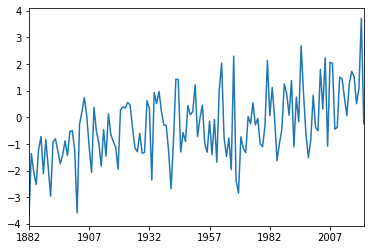

In [63]:
import matplotlib.pyplot as plt

temp_annual_62p5['year'] = temp_annual_62p5['year'].apply(lambda x: int(x))

plt.plot(temp_annual_62p5['year'], temp_annual_62p5['anom'])
plt.xticks(np.arange(int(min_62p5_year),int(max_62p5_year),25))
plt.xlim(int(min_62p5_year),int(max_62p5_year))

## Adding the Annual Temp Anomaly to our Raw Coral/Sponge d18O Data via Lat/Lon Grid

Take the first row of `coral_df` as an example. 

In [64]:
coral_df_lon_formatted = coral_df
coral_df_lon_formatted['lon'] = coral_df_lon_formatted['lon'].apply(lambda x: x + 180)
coral_df_lon_formatted

/var/folders/ws/d7dc4bz53q3_26hs2vbmg8600000gn/T/ipykernel_51705/454556206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coral_df_lon_formatted['lon'] = coral_df_lon_formatted['lon'].apply(lambda x: x + 180)


,Unnamed: 0,lat,lon,elevation,species,year,d18o
0,0,11.170000,119.150000,-4,Montastaea faveolata,1927,-4.067500
1,1,11.170000,119.150000,-4,Montastaea faveolata,1928,-3.865000
2,2,11.170000,119.150000,-4,Montastaea faveolata,1929,-3.865000
3,3,11.170000,119.150000,-4,Montastaea faveolata,1930,-4.007500
4,4,11.170000,119.150000,-4,Montastaea faveolata,1931,-4.040000
...,...,...,...,...,...,...,...
17408,40,20.666667,296.833333,-5,Porites sp.,2008,-5.474000
17409,41,20.666667,296.833333,-5,Porites sp.,2009,-5.249917
17410,42,20.666667,296.833333,-5,Porites sp.,2010,-5.299417
17411,43,20.666667,296.833333,-5,Porites sp.,2011,-5.397417


In [65]:
ex1 = coral_df_lon_formatted.head(1)
ex1

,Unnamed: 0,lat,lon,elevation,species,year,d18o
0,0,11.17,119.15,-4,Montastaea faveolata,1927,-4.0675


In [66]:
get_5x5_grid(16.77, 157.12)

(12.5, 17.5, 152.5, 157.5)

We have to find the average temperature for the year `1928` across those 4 points.

In [67]:
ex1_temp = temp_df[((temp_df['lat'] == 12.5) | (temp_df['lat'] == 17.5)) &
        ((temp_df['lon'] == 152.5) | (temp_df['lon'] == 157.5))] #&
        #(temp_df['year'] == 1928)]
ex1_temp

,time,lat,lon,z,anom,year
4134,1880-02-01,17.5,152.5,0.0,-0.184901,1880
37758,1881-03-01,12.5,152.5,0.0,-0.062720,1881
40350,1881-04-01,12.5,152.5,0.0,0.052602,1881
40351,1881-04-01,12.5,157.5,0.0,0.200180,1881
40422,1881-04-01,17.5,152.5,0.0,0.215631,1881
...,...,...,...,...,...,...
1303781,2021-08-01,17.5,157.5,0.0,0.555222,2021
1306300,2021-09-01,12.5,152.5,0.0,0.730655,2021
1306301,2021-09-01,12.5,157.5,0.0,0.612177,2021
1306372,2021-09-01,17.5,152.5,0.0,0.626079,2021


In [68]:
ex1_annual_temp = ex1_temp.groupby(['year']).agg({'anom': ['mean']}).reset_index()
ex1_annual_temp

,year,anom
,,mean
0,1880,-0.184901
1,1881,0.218206
2,1882,0.527051
3,1883,-0.131200
4,1884,-0.271926
...,...,...
134,2017,0.816447
135,2018,0.586175
136,2019,0.628739


In [69]:
ex1_temp_anom = ex1_annual_temp[ex1_annual_temp['year']=='1928']['anom']['mean'].tolist()[0]
ex1_temp_anom

-0.49565370135416664

In [80]:
ex1['temp_anom'] = ex1_temp_anom
ex1

/var/folders/ws/d7dc4bz53q3_26hs2vbmg8600000gn/T/ipykernel_51705/1628740514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex1['temp_anom'] = ex1_temp_anom


,Unnamed: 0,lat,lon,elevation,species,year,d18o,temp_anom
0,0,11.17,119.15,-4,Montastaea faveolata,1927,-4.0675,-0.495654


**Boom!** Now we just need to replicate this process for every observation in `coral_df`.

## The Actual Process

In [89]:
# given an observation row, return the row with the correct 5x5 temperature anomaly

def get_gridded_temp_anom(lat, lon, year):
    lat1, lat2, lon1, lon2 = get_5x5_grid(lat, lon)
    temp_df_for_lat_lon = temp_df[((temp_df['lat'] == lat1) | (temp_df['lat'] == lat2)) &
                                  ((temp_df['lon'] == lon1) | (temp_df['lon'] == lon2)) &
                                  (temp_df['year'] == str(year))]
    annual_temp_df_for_lat_lon = temp_df_for_lat_lon.groupby(['year']).agg({'anom': ['mean']}).reset_index()
    if len(annual_temp_df_for_lat_lon[annual_temp_df_for_lat_lon['year']==str(year)]['anom']['mean'].tolist()) > 0:
        temp_anom = annual_temp_df_for_lat_lon[annual_temp_df_for_lat_lon['year']==str(year)]['anom']['mean'].tolist()[0]
        return temp_anom
    
    

Testing that it returns the same thing as above:

In [90]:
get_gridded_temp_anom(16.77, 157.12, 1928)

-0.49565370135416664

In [91]:
get_gridded_temp_anom(11.17, 119.15, 1997)

0.10014118308333332

Great success! Next step is to apply this function to every row.

In [92]:
first_20_coral_with_temp_df = coral_df_lon_formatted.head(20)
first_20_coral_with_temp_df['temp_anom'] = first_20_coral_with_temp_df.apply(lambda x: get_gridded_temp_anom(x['lat'], x['lon'], x['year']), axis=1)
first_20_coral_with_temp_df

/var/folders/ws/d7dc4bz53q3_26hs2vbmg8600000gn/T/ipykernel_51705/3099433824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_20_coral_with_temp_df['temp_anom'] = first_20_coral_with_temp_df.apply(lambda x: get_gridded_temp_anom(x['lat'], x['lon'], x['year']), axis=1)


,Unnamed: 0,lat,lon,elevation,species,year,d18o,temp_anom
0,0,11.17,119.15,-4,Montastaea faveolata,1927,-4.0675,-0.405418
1,1,11.17,119.15,-4,Montastaea faveolata,1928,-3.8650,-0.503512
2,2,11.17,119.15,-4,Montastaea faveolata,1929,-3.8650,-0.819141
3,3,11.17,119.15,-4,Montastaea faveolata,1930,-4.0075,-0.337399
4,4,11.17,119.15,-4,Montastaea faveolata,1931,-4.0400,-0.099585
5,5,11.17,119.15,-4,Montastaea faveolata,1932,-3.6075,-0.541486
6,6,11.17,119.15,-4,Montastaea faveolata,1933,-3.8900,-0.497872
7,7,11.17,119.15,-4,Montastaea faveolata,1934,-4.1850,-0.816273
8,8,11.17,119.15,-4,Montastaea faveolata,1935,-4.3525,-0.673577
9,9,11.17,119.15,-4,Montastaea faveolata,1936,-3.9775,-0.528848


I am pretty sure that this will take ~30 minutes to run for the full `coral_df_lon_formatted`, so I will wait to run it on that until we are sure that we are happy with our `all_coral.csv` file! That said, here is the proof that it works :)

In [ ]:
coral_df_lon_formatted_with_temp = coral_df_lon_formatted
coral_df_lon_formatted_with_temp['temp_anom'] = coral_df_lon_formatted.apply(lambda x: get_gridded_temp_anom(x['lat'], x['lon'], x['year']), axis=1)
coral_df_lon_formatted_with_temp